# Example usage

To use `slsvd2` in a project:

In [1]:
import slsvd2

print(slsvd2.__version__)

AttributeError: module 'slsvd2' has no attribute '__version__'

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src.data2 import *

In [1]:
from src.slsvd2 import *

ModuleNotFoundError: No module named 'src'

In [4]:
bin_mat, loadings, scores, diagonal=generate_data_2_way(n=200, d=100, rank=2, random_seed=123)

In [5]:
bin_mat.shape

(200, 100)

In [6]:
np.count_nonzero(loadings,axis=0)

array([20, 20])

In [7]:
np.count_nonzero(scores,axis=0)

array([20, 20])

In [8]:
loadings.T @ loadings

array([[1., 0.],
       [0., 1.]])

In [9]:
scores.T @ scores

array([[1., 0.],
       [0., 1.]])

In [10]:
diagonal

array([[100,   0],
       [  0,  50]])

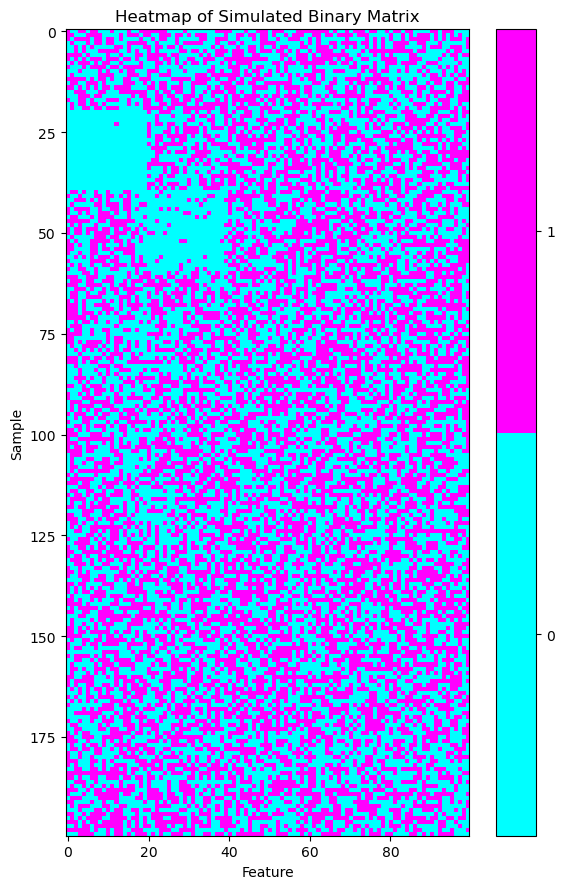

In [11]:
plt.figure(figsize=(6, 9))  # Adjust the width and height as needed

# Create a custom colormap using cyan and magenta
colors = ['cyan', 'magenta']
cmap = plt.matplotlib.colors.ListedColormap(colors, name='custom_cmap', N=2)

plt.imshow(bin_mat, cmap=cmap, interpolation='nearest')

cbar = plt.colorbar(ticks=[0.25, 0.75])
cbar.ax.set_yticklabels(['0', '1'])

plt.title('Heatmap of Simulated Binary Matrix')
plt.xlabel('Feature')
plt.ylabel('Sample')

# Use tight layout to reduce white space
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
mu0, A0, B0,S0,zeros0, BICs0=sparse_logistic_svd_coord_2_way(dat=bin_mat, lambdas=np.array([0]),etas=np.array([0]),k=2) 

In [13]:
mu0

-0.03990237809301834

In [14]:
A0.shape

(200, 2)

In [15]:
S0

array([[53.95416818,  0.        ],
       [ 0.        , 50.60244798]])

In [87]:
thelam=np.logspace(-2, 0.7, num=5)

In [88]:
theeta=np.logspace(-2, 0.7, num=5)

In [89]:
mu, A, B,S, zeros, BICs=sparse_logistic_svd_coord_2_way(dat=bin_mat, lambdas=thelam, etas=theeta, k=2) 

In [90]:
mu

-0.03990237809301834

In [91]:
A.shape

(200, 2)

In [92]:
A.T @ A

array([[1., 0.],
       [0., 1.]])

In [93]:
B.T @ B

array([[1.       , 0.0459907],
       [0.0459907, 1.       ]])

In [94]:
np.count_nonzero(A,axis=0)

array([22, 23])

In [95]:
np.count_nonzero(B,axis=0)

array([21, 19])

In [25]:
S

array([[45.76889348,  0.        ],
       [ 0.        , 41.78218011]])

In [96]:
BICs

array([[29479.83444993, 29784.11845116],
       [29479.3028438 , 29783.33169183],
       [29419.02102371, 29693.76319434],
       [28953.83342924, 29191.40110089],
       [28025.52480428, 28288.19269506],
       [29489.47642815, 29794.27481907],
       [29479.68630423, 29773.73813817],
       [29419.52257327, 29684.23514326],
       [28944.68396379, 29171.95353357],
       [28015.43903759, 28289.03549752],
       [29463.12077194, 29757.56601251],
       [29453.26039251, 29727.11811781],
       [29403.14755811, 29607.90846779],
       [28879.79344629, 29154.65756392],
       [27946.42240179, 28233.57646126],
       [29300.89886756, 29542.98119069],
       [29251.36450058, 29483.3822555 ],
       [29192.03706387, 29335.11964314],
       [28669.43937259, 28960.74868403],
       [27792.86914145, 28019.66037133],
       [29010.51238986, 29251.64695125],
       [28958.31337413, 29223.91814965],
       [28871.59273362, 29086.76152382],
       [28491.0930982 , 28604.19774438],
       [27466.90

In [97]:
range(BICs.shape[0])

range(0, 25)

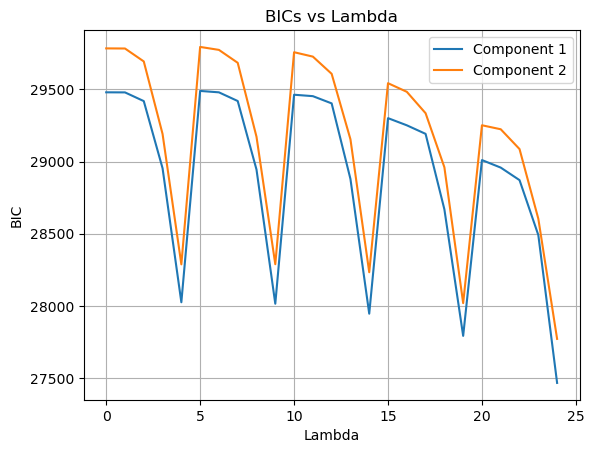

In [98]:
for i in range(BICs.shape[1]):
    plt.plot(range(BICs.shape[0]), BICs[:, i], label=f'Component {i+1}')

plt.xlabel('Lambda')
plt.ylabel('BIC')
plt.title('BICs vs Lambda')
#plt.xscale('log')  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()

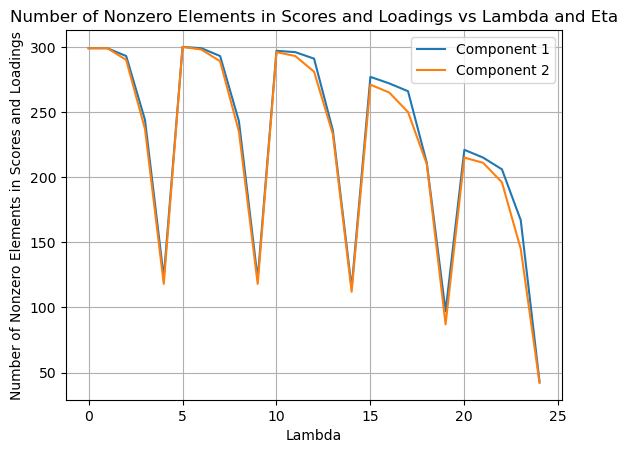

In [101]:
for i in range(zeros.shape[1]):
    plt.plot(range(zeros.shape[0]), zeros[:, i],label=f'Component {i+1}')

plt.xlabel('Lambda')
plt.ylabel('Number of Nonzero Elements in Scores and Loadings')
plt.title('Number of Nonzero Elements in Scores and Loadings vs Lambda and Eta')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
res= A @ S @ B.T

In [103]:
res.shape

(200, 100)

In [104]:
np.max(res),np.min(res)

(0.0, -1.2520874818442669)

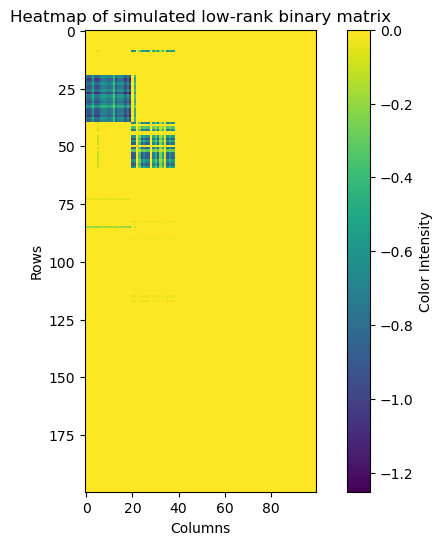

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(res, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Color Intensity')
plt.title('Heatmap of simulated low-rank binary matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [107]:
truth= scores @ diagonal @ loadings.T

In [108]:
truth.shape

(200, 100)

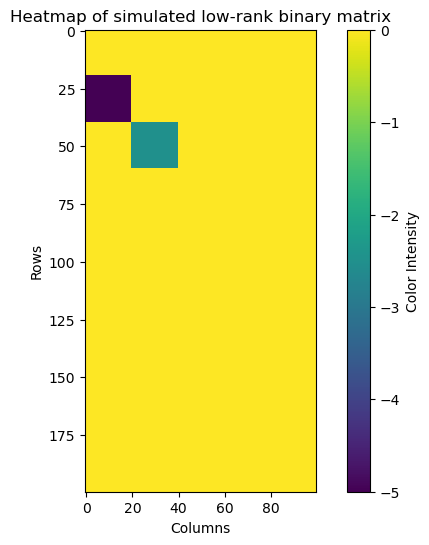

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(truth, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Color Intensity')
plt.title('Heatmap of simulated low-rank binary matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [70]:
from metrics import *

In [110]:
true_positive_rate(B, loadings), false_positive_rate(B, loadings)

(0.95, 0.0125)

In [73]:
true_positive_rate(B0, loadings), false_positive_rate(B0, loadings)

(1.0, 1.0)

In [111]:
true_positive_rate(A, scores), false_positive_rate(A, scores)

(0.95, 0.019444444444444445)

In [74]:
true_positive_rate(A0, scores), false_positive_rate(A0, scores)

(1.0, 1.0)

In [76]:
principle_angle(B, loadings),principle_angle(B0, loadings)

(26.06103718632072, 41.40550410222966)

In [78]:
principle_angle(A, scores),principle_angle(A0, scores)

(26.211280491692378, 49.97653429866916)

In [113]:
mse(B,loadings),mse(B0,loadings)

(0.60073341273732, 1.3711034184084476)

In [112]:
mse(A,scores),mse(A0,scores)

(0.6062899052614977, 1.947866384661322)

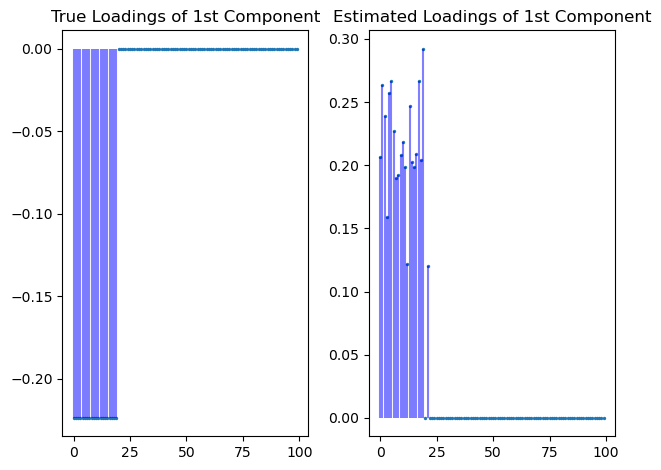

In [114]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 0])), loadings[:, 0], s=2)
for i, val in enumerate(loadings[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Loadings of 1st Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 0])), B[:, 0], s=2)
for i, val in enumerate(B[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Loadings of 1st Component')

plt.tight_layout()
plt.show()

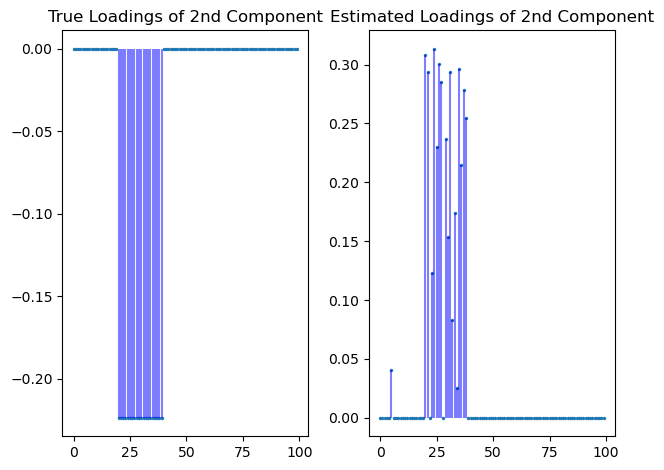

In [115]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 1])), loadings[:, 1], s=2)
for i, val in enumerate(loadings[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Loadings of 2nd Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 1])), B[:, 1], s=2)
for i, val in enumerate(B[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Loadings of 2nd Component')

plt.tight_layout()
plt.show()

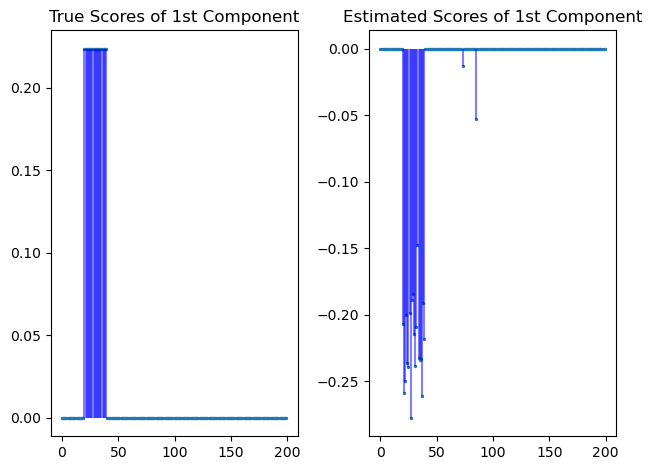

In [116]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(scores[:, 0])), scores[:, 0], s=2)
for i, val in enumerate(scores[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Scores of 1st Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(scores[:, 0])), A[:, 0], s=2)
for i, val in enumerate(A[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Scores of 1st Component')

plt.tight_layout()
plt.show()

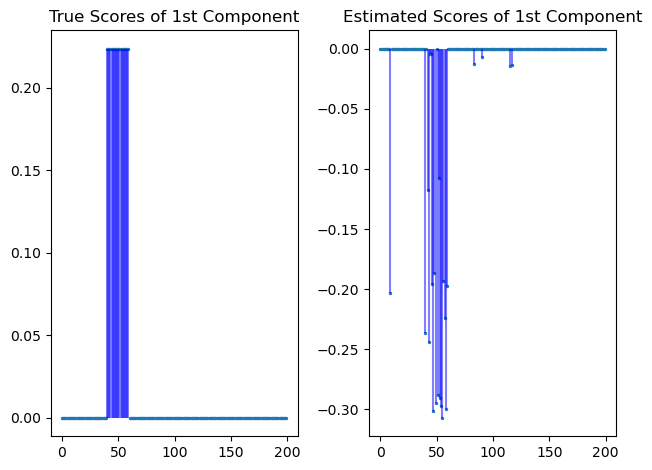

In [117]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(scores[:, 1])), scores[:, 1], s=2)
for i, val in enumerate(scores[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Scores of 1st Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(scores[:, 1])), A[:, 1], s=2)
for i, val in enumerate(A[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Scores of 1st Component')

plt.tight_layout()
plt.show()

In [41]:
C

NameError: name 'C' is not defined

In [ ]:
np.diag((1,3))

array([[1, 0],
       [0, 3]])

In [ ]:
bin_mat.shape

(200, 100)

In [ ]:
dat=bin_mat

In [ ]:
S

array([[26.8313209 ,  0.        ],
       [ 0.        , 24.60690865]])

In [ ]:
(A @ S @ B.T).shape

(200, 100)